<a href="https://colab.research.google.com/github/jpmartinez654-gif/NaiveBayes/blob/test-naivebayes/ml/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes Model Background

Naive Bayes is a popular classification algorithm based on Bayes' theorem, which is used for supervised learning tasks, particularly in the field of machine learning and natural language processing. Despite its simplicity, Naive Bayes can be surprisingly effective in many real-world scenarios.

**How Naive Bayes works:**
Naive Bayes is a probabilistic model that makes predictions by calculating the probability of a given input belonging to a particular class. It assumes that all features are independent of each other, which is where the term "naive" comes from. This is a strong assumption and may not hold true in all cases, but in practice, Naive Bayes can still perform well, especially with discrete features or when there are many irrelevant features that cancel each other out.

The algorithm is based on Bayes' theorem:

```
P(y|x) = (P(x|y) * P(y)) / P(x)
```

where:
- `P(y|x)` is the posterior probability of class `y` given input `x`.
- `P(x|y)` is the likelihood of input `x` given class `y`.
- `P(y)` is the prior probability of class `y`.
- `P(x)` is the evidence probability of input `x`.

**Pros of Naive Bayes:**
1. **Simplicity and Speed:** Naive Bayes is easy to implement and computationally efficient. It is particularly useful for large datasets.
2. **Scalability:** Due to its simplicity and low computational overhead, Naive Bayes can handle high-dimensional data well.
3. **Good with small datasets:** It requires fewer training data compared to more complex algorithms, making it suitable for cases with limited labeled data.
4. **Real-time predictions:** Because of its speed, Naive Bayes is often used for real-time applications.
5. **Interpretability:** The results are easily interpretable, providing insights into the importance of different features.

**Cons of Naive Bayes:**
1. **Naive Assumption:** The independence assumption may not hold in many real-world scenarios, which can lead to suboptimal predictions.
2. **Limited Expressiveness:** Due to its simplicity, Naive Bayes may not capture complex relationships in the data as well as more sophisticated models.
3. **Zero Probability Issue:** If a certain feature value in the test data wasn't present in the training data for a particular class, Naive Bayes assigns a zero probability, resulting in inaccurate predictions.
4. **Sensitive to Feature Correlations:** Since it assumes independence among features, correlated features can negatively impact performance.
5. **Continuous Features Handling:** Naive Bayes works well with discrete features but may require some data preprocessing for continuous features.

**When to use Naive Bayes:**
Naive Bayes is most suitable when:
1. The independence assumption is reasonably valid for the given problem.
2. You have a large dataset, and efficiency is a priority.
3. The problem at hand is relatively simple, and complex interactions between features are not essential for accurate predictions.
4. You have limited labeled data, and you want a quick and interpretable solution.
5. You need to make real-time predictions.

It's important to note that while Naive Bayes can be a good starting point, especially for text classification tasks, it's always a good idea to compare its performance with other more complex algorithms to ensure you are getting the best possible results for your specific problem.

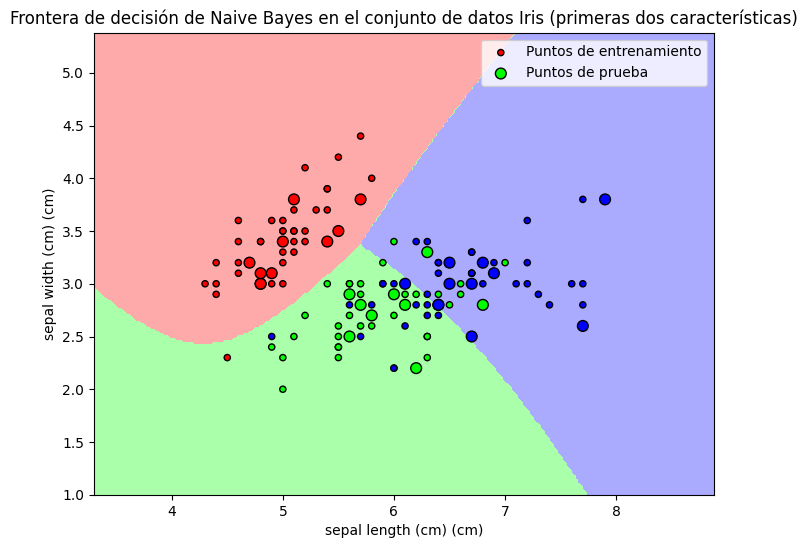

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# We only take the first two features for visualization purposes
X_viz = X[:, :2]

# Split the dataset into training and testing sets for visualization
# Using the same random state as before for consistency
X_train_viz, X_test_viz, y_train_viz, y_test_viz = train_test_split(X_viz, y, test_size=0.2, random_state=42)

# Create and train the Naive Bayes classifier using only the first two features
nb_classifier_viz = GaussianNB()
nb_classifier_viz.fit(X_train_viz, y_train_viz)

# Plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_viz[:, 0].min() - 1, X_viz[:, 0].max() + 1
y_min, y_max = X_viz[:, 1].min() - 1, X_viz[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the class for each point in the mesh
Z = nb_classifier_viz.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_train_viz[:, 0], X_train_viz[:, 1], c=y_train_viz, cmap=cmap_bold, edgecolor='k', s=20, label='Puntos de entrenamiento')
# Plot the testing points
plt.scatter(X_test_viz[:, 0], X_test_viz[:, 1], c=y_test_viz, cmap=cmap_bold, edgecolor='k', s=60, label='Puntos de prueba')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Frontera de decisión de Naive Bayes en el conjunto de datos Iris (primeras dos características)")
plt.xlabel(iris.feature_names[0] + ' (cm)') # Adding units for clarity
plt.ylabel(iris.feature_names[1] + ' (cm)') # Adding units for clarity
plt.legend()
plt.show()

# Code Example

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset from scikit-learn
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("\nConfusion Matrix:")
print(confusion_mat)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 100.00%

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Code breakdown


1. Import the required libraries:
   - `numpy` (aliased as `np`) for numerical operations.
   - `pandas` (aliased as `pd`) for data manipulation and analysis.
   - `train_test_split` from `sklearn.model_selection` to split the dataset into training and testing sets.
   - `GaussianNB` from `sklearn.naive_bayes` to create and train the Naive Bayes classifier.
   - `accuracy_score`, `classification_report`, and `confusion_matrix` from `sklearn.metrics` to evaluate the classifier's performance.

2. Load the Iris dataset from scikit-learn:
   - The Iris dataset is one of the standard datasets available in scikit-learn, representing iris flower species with four features (sepal length, sepal width, petal length, petal width) and one target variable (species class).

3. Split the dataset into training and testing sets:
   - `train_test_split(X, y, test_size=0.2, random_state=42)`: This function randomly splits the data into training and testing sets. It takes the features (X) and target labels (y) as input and returns four sets: `X_train`, `X_test`, `y_train`, and `y_test`. The test set size is set to 20% of the entire dataset, and `random_state=42` ensures reproducibility by fixing the random seed.

4. Create and train the Naive Bayes classifier:
   - `GaussianNB()`: Creates an instance of the Gaussian Naive Bayes classifier, which is appropriate for continuous features like the ones in the Iris dataset.
   - `nb_classifier.fit(X_train, y_train)`: Trains the Naive Bayes classifier using the training data (`X_train` and `y_train`).

5. Make predictions on the test set:
   - `y_pred = nb_classifier.predict(X_test)`: The trained classifier is used to predict the target labels (`y_pred`) for the test set (`X_test`).

6. Evaluate the classifier's performance:
   - `accuracy_score(y_test, y_pred)`: Calculates the accuracy of the classifier by comparing the predicted labels (`y_pred`) with the true labels from the test set (`y_test`).
   - `confusion_matrix(y_test, y_pred)`: Computes the confusion matrix, which is a table showing the true positive, true negative, false positive, and false negative counts for each class.
   - `classification_report(y_test, y_pred)`: Generates a detailed report showing precision, recall, F1-score, and support for each class.

7. Print the results:
   - The script prints the accuracy, confusion matrix, and classification report to evaluate the Naive Bayes classifier's performance.

That's it! The code loads the Iris dataset, splits it into training and testing sets, trains a Naive Bayes classifier, makes predictions on the test set, and evaluates the classifier's accuracy using various metrics.

# Real world application


**Example: Diagnosing a Respiratory Infection**

Imagine a healthcare provider wants to diagnose whether a patient has a respiratory infection (e.g., common cold, flu, or pneumonia) based on the patient's symptoms. The symptoms to consider are:

1. Cough (Yes or No)
2. Fever (Yes or No)
3. Runny Nose (Yes or No)
4. Shortness of Breath (Yes or No)

Additionally, the healthcare provider has historical data of patients who were diagnosed with respiratory infections and the corresponding symptoms they exhibited.

**Building the Naive Bayes Model**

1. **Data Collection:** The healthcare provider collects data from a group of patients who were diagnosed with respiratory infections and notes their symptoms (cough, fever, runny nose, and shortness of breath). This data forms the positive class.

2. **Data Collection for Negative Class:** The healthcare provider also collects data from a group of patients who were not diagnosed with respiratory infections and notes their symptoms. This data forms the negative class.

3. **Data Preprocessing:** The data is preprocessed to encode categorical features (Yes or No) as binary values (1 or 0).

4. **Training the Naive Bayes Model:** The healthcare provider uses the preprocessed data to train a Naive Bayes classifier. The Naive Bayes model calculates the probability of each symptom given the presence or absence of a respiratory infection (positive or negative class). It assumes independence among the symptoms, which is a common assumption in Naive Bayes.

5. **Making Predictions:** Once the model is trained, the healthcare provider can use it to make predictions for new patients. When a new patient visits with specific symptoms, the model calculates the probability of each class (respiratory infection or no respiratory infection) based on the symptoms exhibited by the patient. The model predicts the class with the higher probability as the diagnosis for the patient.

**Real-World Application**

Suppose a new patient visits the healthcare provider with symptoms: cough (Yes), fever (Yes), runny nose (Yes), and shortness of breath (No). The Naive Bayes model calculates the probabilities for both classes (respiratory infection and no respiratory infection) based on the patient's symptoms. If the probability of respiratory infection is higher, the model predicts that the patient has a respiratory infection and prescribes appropriate treatment or further diagnostic tests.

It's important to note that while Naive Bayes can be useful in certain scenarios, it may not capture complex relationships between symptoms, and its performance heavily relies on the quality and representativeness of the training data. In real-world healthcare settings, more sophisticated models and extensive data may be required for accurate and reliable medical diagnosis. Naive Bayes serves as an elementary example, but actual medical decision-making typically involves a more comprehensive approach.

# FAQ


1. What is the Naive Bayes model, and how does it work?
   - The Naive Bayes model is a probabilistic machine learning algorithm used for classification tasks. It's based on Bayes' theorem and makes a "naive" assumption that features are conditionally independent given the class label.

2. Why is it called "Naive" Bayes?
   - It is called "Naive" because it makes a simplifying assumption that the features are independent, which is often not the case in real-world scenarios. Despite this assumption, Naive Bayes often performs surprisingly well in practice and is computationally efficient.

3. In which applications is Naive Bayes commonly used?
   - Naive Bayes is commonly used in text classification tasks like spam detection, sentiment analysis, document categorization, and language identification. It's also used in various other domains like medical diagnosis, recommendation systems, and fraud detection.

4. How does Naive Bayes handle continuous and categorical features?
   - Naive Bayes can handle both continuous and categorical features. For continuous features, it typically assumes a Gaussian (normal) distribution. For categorical features, it estimates probabilities using frequency counts.

5. Is Naive Bayes suitable for high-dimensional data?
   - Yes, Naive Bayes is particularly well-suited for high-dimensional data, like text data, where the number of features can be very large. Its performance often remains competitive even with a large number of features.

6. What are the advantages of using Naive Bayes?
   - Naive Bayes is simple, easy to implement, and computationally efficient. It works well with high-dimensional data and requires relatively little training data. It can also handle missing values gracefully.

7. What are the limitations of the Naive Bayes model?
   - The main limitation of Naive Bayes is its assumption of feature independence, which may not hold true in some cases. Due to this assumption, it may not perform well on datasets with strong interdependencies between features. However, it still performs reasonably well in practice.

8. Can Naive Bayes handle multi-class classification?
   - Yes, Naive Bayes can handle multi-class classification tasks. It assigns the class label with the highest probability among all classes.

9. Is Naive Bayes sensitive to irrelevant features?
   - Naive Bayes is generally considered to be somewhat robust to irrelevant features because it relies on probabilities rather than weights assigned to features. However, extremely irrelevant features may still have some impact on the model's performance.

10. How does Laplace smoothing (additive smoothing) help in Naive Bayes?
    - Laplace smoothing is used to address the problem of zero probabilities for unseen features. It adds a small value (usually 1) to all feature counts during probability estimation to ensure non-zero probabilities for all features, even those not seen in the training data. This prevents the model from assigning zero probabilities to unseen data during testing.

# Quiz


**Question 1:** What is the underlying principle behind the Naive Bayes algorithm?

**a)** It uses complex probabilistic calculations to make predictions.
**b)** It assumes that features are independent given the class.
**c)** It relies on deep neural networks for feature extraction.
**d)** It only works with binary classification problems.

**Question 2:** In the context of a Naive Bayes classifier, what does the "naive" assumption refer to?

**a)** The algorithm assumes that the features are irrelevant to the class labels.
**b)** The algorithm assumes that the features are not correlated with each other.
**c)** The algorithm assumes that all features have equal importance.
**d)** The algorithm assumes that the class labels are randomly assigned.

**Question 3:** When is the Naive Bayes algorithm particularly useful?

**a)** When dealing with large datasets with complex relationships between features.
**b)** When the assumption of feature independence does not hold true.
**c)** When the dataset has a small number of features and limited training data.
**d)** When the class distribution is highly imbalanced.

**Question 4:** Which of the following types of Naive Bayes algorithms is suitable for text classification tasks, where the features are typically words or terms?

**a)** Gaussian Naive Bayes
**b)** Multinomial Naive Bayes
**c)** Bernoulli Naive Bayes
**d)** Poisson Naive Bayes

**Question 5:** How does the Naive Bayes algorithm handle missing data during the prediction process?

**a)** It replaces missing values with the mean of the available data.
**b)** It removes the instances with missing values from the dataset.
**c)** It assigns a probability of 0 to missing values and continues calculations.
**d)** It imputes missing values based on the mode of the feature's distribution.

**Question 6:** In a binary classification problem, if the probability of an instance belonging to class A is higher than class B according to the Naive Bayes algorithm, how is the instance classified?

**a)** The instance is classified as class A.
**b)** The instance is classified as class B.
**c)** Both classes are assigned to the instance based on their probabilities.
**d)** The instance is discarded due to uncertainty.

**Question 7:** What is the formula for calculating the posterior probability using the Naive Bayes algorithm?

**a) P(class|features) = P(features|class) * P(class) / P(features)**
**b) P(features|class) = P(class|features) * P(features) / P(class)**
**c) P(class) = P(features|class) * P(class|features) / P(features)**
**d) P(features) = P(class|features) * P(features|class) / P(class)**

**Question 8:** In text classification using Naive Bayes, how is the "bag-of-words" model represented?

**a)** A sequential model of word tokens.
**b)** A tree-based structure of syntactic relationships.
**c)** A matrix representing word frequencies in each document.
**d)** A graph of semantic connections between words.

**Question 9:** Which assumption of the Naive Bayes algorithm can sometimes lead to suboptimal performance, especially in cases where features are not completely independent?

**a)** The assumption of equal feature importance.
**b)** The assumption of conditional feature dependence.
**c)** The assumption of class label irrelevance.
**d)** The assumption of feature distribution symmetry.

**Question 10:** When can Laplace (additive) smoothing be useful in Naive Bayes?

**a)** When dealing with categorical features only.
**b)** When the dataset has a small number of instances.
**c)** When features are strongly correlated with each other.
**d)** When dealing with continuous numerical features.

**Answers:**
1. b
2. b
3. c
4. b
5. c
6. a
7. a
8. c
9. b
10. b

# Project Ideas


1. **Disease Diagnosis**:
    - Objective: Predict the likelihood of a patient having a specific disease (e.g., diabetes, heart disease) based on their medical history and test results.
    - Data: Patient medical records (anonymized), symptoms, laboratory test results.

2. **Medical Text Classification**:
    - Objective: Classify medical research papers or clinical notes into categories such as diagnosis, treatment, prognosis, etc.
    - Data: Collection of medical research papers, clinical notes, or medical transcriptions.

3. **Predicting Patient Readmission**:
    - Objective: Predict the likelihood of a patient being readmitted to the hospital within a certain timeframe.
    - Data: Patient demographics, diagnosis details, treatments provided, previous hospitalizations.

4. **Medication Side Effect Prediction**:
    - Objective: Predict possible side effects a patient might experience when taking a medication, based on their medical history.
    - Data: Medical histories and patient reports on medication side effects.

5. **Sentiment Analysis on Patient Reviews**:
    - Objective: Analyze sentiments (positive, negative, neutral) from patient reviews about hospitals, treatments, or doctors.
    - Data: Reviews or feedback from patients from online forums, hospital websites, or satisfaction surveys.

6. **Healthcare Product Reviews**:
    - Objective: Classify user reviews of healthcare products into categories like effective, not effective, caused side effects, etc.
    - Data: User reviews from e-commerce sites, forums, or surveys.

7. **Predicting Disease Outbreaks**:
    - Objective: Analyze data from different regions to predict potential disease outbreaks.
    - Data: Historical data on disease incidence rates, vaccination rates, and environmental factors.

8. **Genetic Trait Prediction**:
    - Objective: Predict the likelihood of an individual having or passing on a genetic trait/disease based on genetic markers.
    - Data: Genetic data samples, family history.

9. **Spam Detection in Medical Literature**:
    - Objective: Filter out irrelevant or potentially misleading medical content/advertisements from genuine research papers or articles.
    - Data: Collection of medical articles, both genuine and promotional.

10. **Mental Health Analysis from Social Media**:
    - Objective: Analyze social media posts to predict potential mental health issues or states.
    - Data: Anonymized social media posts, mental health self-reports.




# Practical Example

Below is a simple example demonstrating how to use the Naive Bayes classifier with the famous "breast cancer" dataset from the scikit-learn library. The dataset is used to classify breast cancer as malignant or benign based on certain features.

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load the breast cancer dataset
data = load_breast_cancer()

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

# Initialize Gaussian Naive Bayes
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Predict on test set
y_pred = gnb.predict(X_test)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))



This is a simple demonstration. In a real-world application, you would:

Investigate the data and its features in more detail.
Consider performing feature scaling or normalization if required.
Maybe apply some feature selection techniques to pick the most relevant features.
Consider other algorithms to benchmark the Naive Bayes performance against them.
Remember, the quality of the predictions depends not only on the model you use, but also on the quality and quantity of your data and the features you choose.